# Customer Churn - Previsão de Perda de Clientes

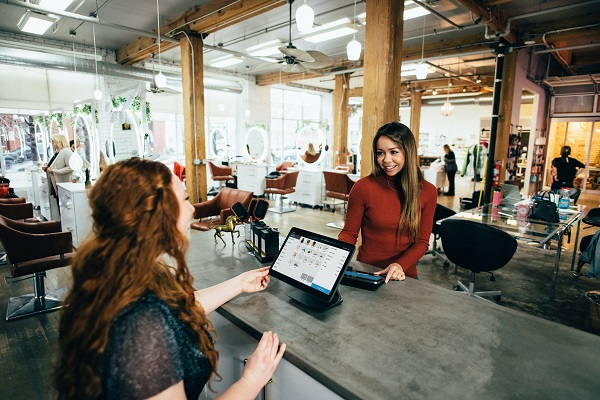

O índice 'churn', é o índice que mede a saída de clientes ou materiais mediante à um período.
O churn, conhecido também como 'índice de atrito', diz respeito à saída de clientes de uma empresa, e como consequência, perda de receita.

Normalmente, o churn é registrado em uma base de dados de cadastro de clientes, relacionando o tempo de permanência de um determinado cliente com outros fatores que podem - ou não - acarretar sua saída ou abandono de serviço.

Este ítem é muito importante de ser medido e controlado, pois é um importante fator que mede a qualidade do serviço oferecido
e um importante preditor de receita ao longo do tempo, uma vez que o churn pode significar queda nas receitas.


Este projeto utlizando Machine Learning, foi desenvolvido para prever o comportamento e os fatores que levam a perda de clientes.

Foram escolhidas, dentre tantos outros, 3 classificadores para criação do modelo:
- Regressão Logística
- Árvore de Decisão
- Random Forest
Todos os modelos vem da biblioteca Scikit-Learn (https://scikit-learn.org/stable/), juntamente com as funções de medidas de desempenho do modelo (metrics).




# Tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import sklearn as sk
from sklearn import metrics as metrics
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.width', 180)

# 1. CARREGAMENTO DO DATASET

In [4]:
# O seguinte dataset foi disponibilizado pelo Kaggle em https://www.kaggle.com/mervetorkan/churndataset com o objetivo de
# preever o comportamento de saída de clientes, definido pela coluna 'Exited'. A descrição das features a seguir:



dataset = pd.read_csv('dados/churn.csv', sep = ',')
dataset.set_index(['RowNumber'], inplace=True)

In [5]:
dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [6]:
# Shape do dataset, linhas por colunas.
dataset.shape

(10000, 13)

# 2. ANÁLISE EXPLORATÓRIA DE DADOS

In [7]:
# Colunas do dataset.
dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

In [8]:
# Tipos de cada coluna do dataset.
dataset.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Informações de valores não nulos no dataset. Não há nenhuma linha com valor nulo.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
# Estatística descritiva do dataset.

dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Geography', ylabel='count'>

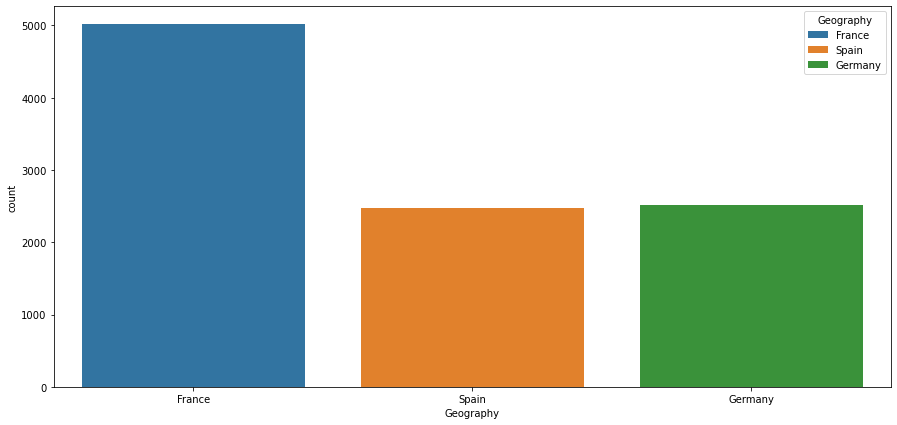

In [11]:
# Contagem de dados por países distintos. 

fig, ax = plt.subplots(figsize=(15,7))
sb.countplot(dataset['Geography'], hue=dataset['Geography'], dodge=False)

# 3. FEATURE ENGINEERING

## 3-1. Grouping - AGE

In [12]:
# Range da coluna 'Age'.

{"Mínimo": min(dataset['Age']), 
 'Máximo': max(dataset['Age'])}

{'Mínimo': 18, 'Máximo': 92}

In [13]:
# Definição de grupos de idade, para agrupar valores da coluna 'Age'.

def age_range(x):
    if x > 0 and x <= 25:
        return '0-25'
    elif x > 25 and x <= 35:
        return '26-35'
    elif x > 35 and x <= 45:
        return '36-45'
    elif x > 45 and x <= 55:
        return '46-55'
    elif x > 55 and x <= 65:
        return '56-65'
    elif x > 65 and x <= 75:
        return '66-75'
    elif x > 75 and x <= 85:
        return '76-85'
    elif x > 85 and x < 95:
        return '86-95'

In [14]:
# Usando a função apply para aplicar a função na coluna 'Age', criando uma nova coluna 'age_range' para receber os valores.

dataset['age_range'] = dataset.Age.apply(age_range)

In [15]:
# Contagem de valores de cada grupo da coluna 'age_range'.

dataset['age_range'].value_counts()

36-45    3736
26-35    3542
46-55    1311
0-25      611
56-65     536
66-75     219
76-85      42
86-95       3
Name: age_range, dtype: int64

<AxesSubplot:xlabel='age_range', ylabel='count'>

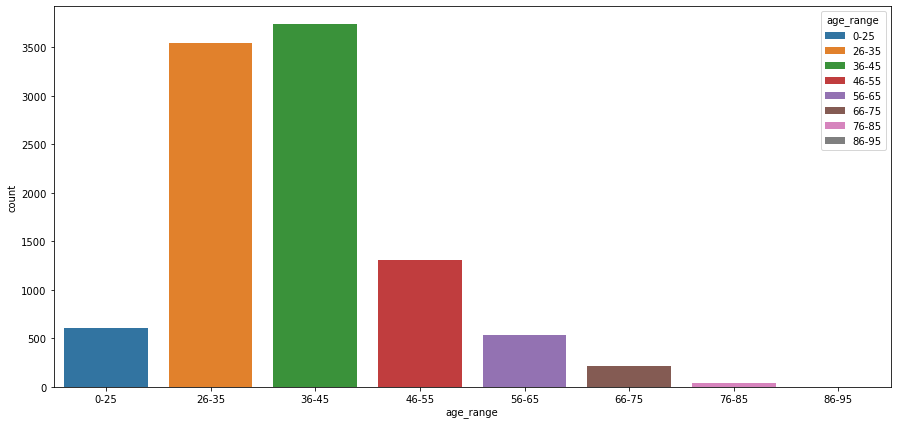

In [16]:
# Distribuição de idade por grupos.

fig, ax = plt.subplots(figsize=(15,7))
sb.countplot(x=dataset['age_range'].astype(str).sort_values(), data=dataset, hue=dataset['age_range'].sort_values(),dodge=False)

<AxesSubplot:xlabel='Age', ylabel='Count'>

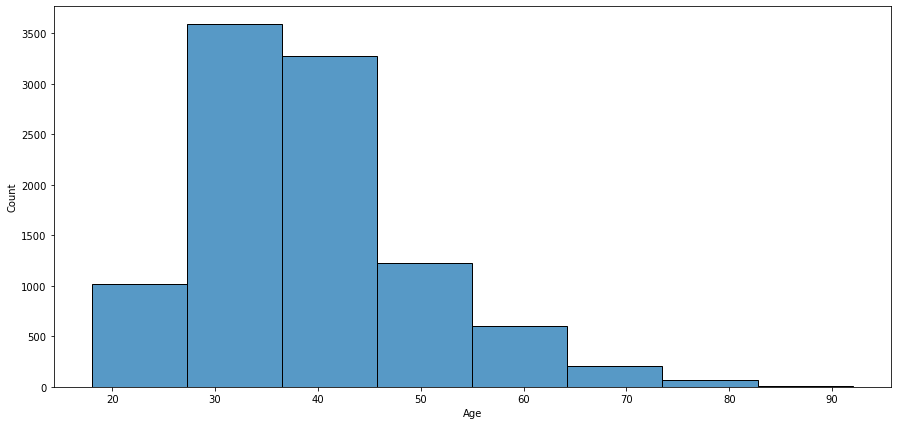

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sb.histplot(dataset['Age'], bins=8)

## 3-2. Grouping - TENURE 

In [18]:
# Tenure pode ser definido como taxa de permanência. Neste dataset, está descrito em meses.
# Range de 'Tenure'.

{"Mínimo": min(dataset['Tenure']), 
 'Máximo': max(dataset['Tenure'])}

{'Mínimo': 0, 'Máximo': 10}

<AxesSubplot:xlabel='Tenure', ylabel='count'>

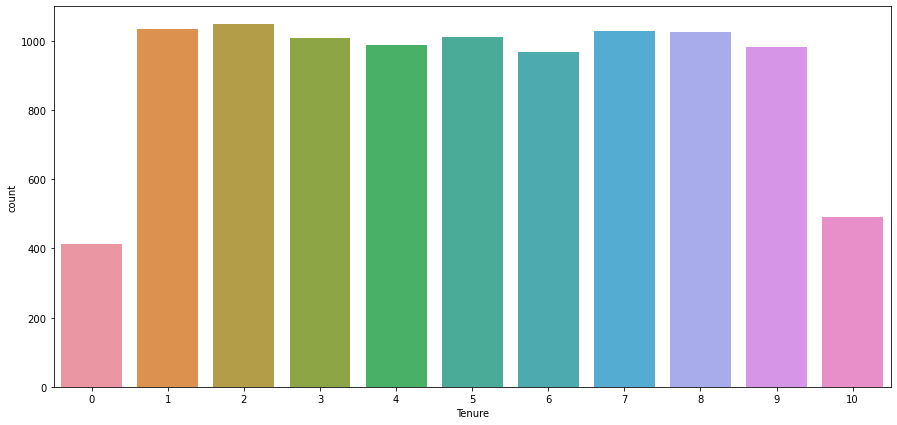

In [19]:
# Plot para visualizar a distribuição da taxa de permanência dos clientes.

plt.figure(figsize=(15,7))
sb.countplot(dataset['Tenure'])

## 3-3. Grouping - SALARY

In [20]:
# Range da coluna 'Salary'.

{"Mínimo": min(dataset['EstimatedSalary']), 
 'Máximo': max(dataset['EstimatedSalary'])}

{'Mínimo': 11.58, 'Máximo': 199992.48}

In [21]:
# Criando range de Salário

def salary_range(x):
    if x > 0 and x <= 50000:
        return '0k - 50k'
    if x > 50000 and x <= 100000:
        return '50k - 100k'
    if x > 100000 and x <= 150000:
        return '100k - 150k'
    if x > 150000 and x <= 200000:
        return '150k - 200k'

In [22]:
dataset['salary_range'] = dataset.EstimatedSalary.apply(salary_range)

<AxesSubplot:xlabel='salary_range', ylabel='count'>

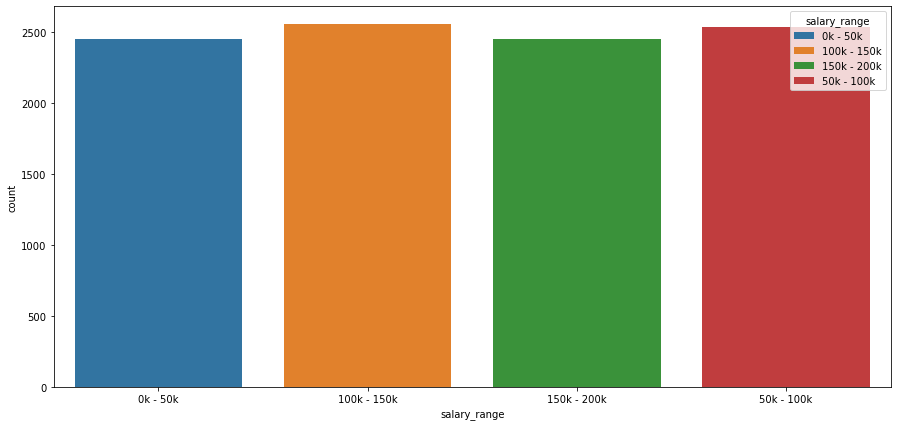

In [23]:
plt.figure(figsize=(15,7))
sb.countplot(x=dataset['salary_range'].sort_values(), data=dataset, hue=dataset['salary_range'].sort_values(), dodge=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

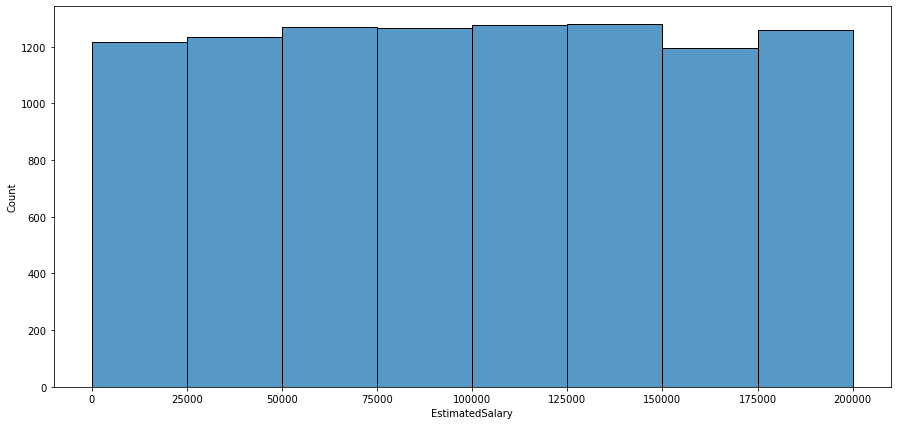

In [24]:
# Distribuição de faixa de salários em histograma
fig, ax = plt.subplots(figsize=(15,7))
sb.histplot(dataset['EstimatedSalary'], bins=8)

# 4. ANÁLISE DESCRITIVA

## 4-1. Correlação entre as variáveis

In [25]:
# Tabela de correlação das variáveis do dataset. 1 indica correlação ideal.

dataset_correlation = dataset.corr()

dataset_correlation

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

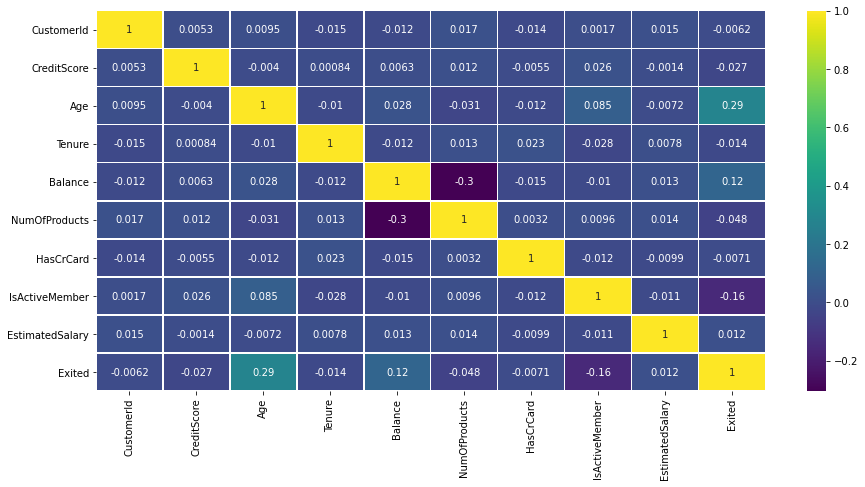

In [26]:
# Plot da tabela de correlação do dataset.

fig, ax = plt.subplots(figsize=(15,7))
sb.heatmap(dataset.corr(), annot=True, linewidths=.5, cmap='viridis')

# 5. DATA WRANGLING

In [27]:
# Criação de um dataframe destindo para manipulação do modelo de regressão logística.

df = dataset

In [28]:
df = df.drop(columns=['Surname'])
df = df.drop(columns=['age_range'])
df = df.drop(columns=['salary_range'])

## 5-1. Tranformação das colunas categóricas

In [29]:
# Transformando a coluna 'Country' em numérico.
def country_change(x):
    if x == 'France':
        return 1
    elif x == 'Spain':
        return 2
    elif x == 'Germany':
        return 3

In [30]:
df['Geography'] = df.Geography.apply(country_change)

In [31]:
# Transformando a coluna 'Gender' para numérico.
def sex_change(x):
    if x == 'Male':
        return 1
    if x == 'Female':
        return 2

In [32]:
df['Gender'] = df.Gender.apply(sex_change)

In [33]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,1,2,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,2,2,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,1,2,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,1,1,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,1,2,36,7,0.00,1,0,1,42085.58,1


## 5-2. Criando varíáveis para os modelos de machine learning de regressão e classificação

In [34]:
# Criando as variáveis de treino do modelo, onde o dataframe 'predictors' contém as variáveis preditoras/independentes 
# do modelo. O dataframe 'target' contém a variável dependente, que será determinada pelo modelo.

predictors = df.iloc[:, 1:11]

target = df['Exited'].copy()

# 6. MACHINE LEARNING - REGRESSÃO LOGÍSTICA (LOGISTIC REGRESSION)

## 6-1. Definição e Aplicação do Modelo de Regressão Logística

In [35]:
# Definindo o modelo de Regressão Logística, vindo da biblioteca Scikit-Learn

model_LR = LogisticRegression()

In [36]:
# Fit do modelo, utilizando as variáveis definidas previamente.

model_LR_fit = model_LR.fit(predictors, target)

In [37]:
# Dataframe para receber o valores previstos.

model_LR_predict = model_LR.predict(predictors)

In [38]:
# Criação de uma nova coluna 'predictions' com os valores de output do modelo aplicado, inserindo no dataframe prepardo 'df_lr'

df['predictions_LR'] = model_LR_predict

## 6-2. Avaliação de Performance do Modelo de Regressão Logística

### 6-2-1. MAE - Mean Absolute Error

In [39]:
# Definição do Erro Absoluto Médio (MAE), onde diz que a cada previsão feita pelo modelo, há uma chancede 21% de erro. 
# MAE = MEAN ABSOLUTE ERROR.

mae_LR = metrics.mean_absolute_error(df['Exited'], df['predictions_LR'])

print('O erro médio absoluto (MAE) é de {}'.format(mae_LR))

O erro médio absoluto (MAE) é de 0.2101


### 6-2-2. Acurácia do Modelo (Score Accuracy)

In [40]:
# Avaliando a eficácia do modelo. O modelo de avaliação será a Acurácia, definido pela função score.
# A acurácia (accuracy) do modelo diz que o modelo é capaz de acerta em 78,99% dos casos previstos.

score_LR = model_LR.score(predictors, target)
score_LR = round(score_LR*100,2)

print('A acurácia do modelo (score) é de {}%'.format(score_LR))

A acurácia do modelo (score) é de 78.99%


### 6-2-3. Matrix de Confusão (Confusion Matrix) - Modelo Regressão Logística

In [41]:
#Avaliação da matrix de confusão do modelo preditivo. 
#Em termos, a matrix de confusão nos diz que acertou 7784+115 vezes e se equivocou 1922+179 vezes, em relação ao dataframe.
#A matriz de confusão plota os Verdadeiros Positivos e Verdadeiros Negativos, contra os Falsos Positivos e Falsos Negativos.

cmatrix_LR = metrics.confusion_matrix(target, model_LR_predict)
print("Verdadeiro Positivo : ", cmatrix_LR[1, 1])
print("Verdadeiro Negativo : ", cmatrix_LR[0, 0])
print("Falso Positivo      : ", cmatrix_LR[0, 1])
print("Falso Negativo      : ", cmatrix_LR[1, 0])

Verdadeiro Positivo :  115
Verdadeiro Negativo :  7784
Falso Positivo      :  179
Falso Negativo      :  1922


### 6-2-4. Report de Classificação de Modelo - Classification Report - Regressão Logística

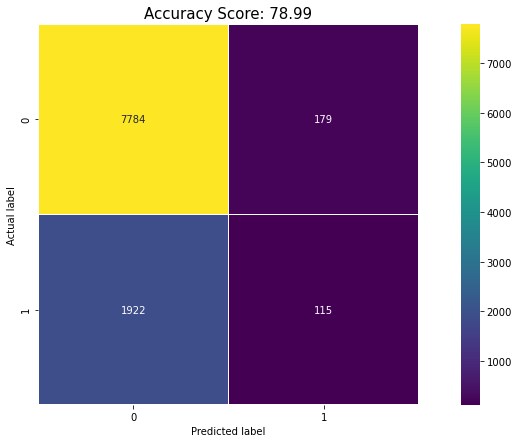

In [42]:
# Plot da matrix de confusão (Confusion Matrix).

plt.figure(figsize=(15,7))

sb.heatmap(cmatrix_LR, annot=True, fmt=".0f", linewidths=.5, square = True, cmap='viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_LR)
plt.title(all_sample_title, size = 15);

In [43]:
# Utlizanddo a função 'classification_report' da biblioteca scikit-learn.metrics para sumarizar os resultados dos modelos de
# treino.

print(classification_report(model_LR.predict(predictors),(target)))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9706
           1       0.06      0.39      0.10       294

    accuracy                           0.79     10000
   macro avg       0.52      0.60      0.49     10000
weighted avg       0.95      0.79      0.86     10000



### 6-2-5. Curva ROC | Modelo Árvore de Decisão

<Figure size 432x288 with 0 Axes>

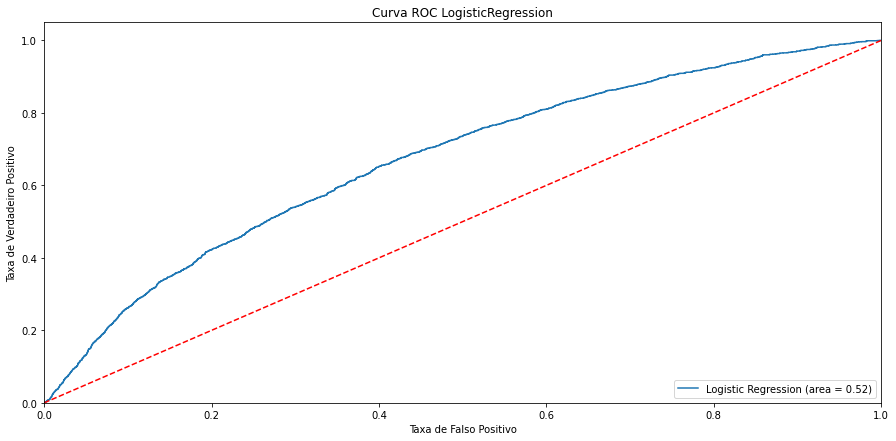

In [44]:
# A curva ROC é outra ferramenta utilizada para determinar classificadores bináros. 
# A linha pontilhada é determinada por um classificador randômico presente no modelo. Um bom classificador se mantém o mais
# distante possível da curva ROC (linha vermelha).

LR_roc_auc = roc_auc_score(target, model_LR.predict(predictors))
fpr, tpr, thresholds = roc_curve(target, model_LR.predict_proba(predictors)[:,1])
plt.figure()
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC LogisticRegression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 7. MACHINE LEARNING - ÁRVORE DE DECISÃO (CART)

## 7-1. Definição e aplicação do modelo de Árvore de Decisão (CART)

In [45]:
# Definição do modelo

model_CART = DecisionTreeClassifier()

In [46]:
# Fit do modelo

model_CART_fit = model_CART.fit(predictors, target)

In [47]:
# Predição do modelo

model_CART_predict = model_CART.predict(predictors)

In [48]:
# Criação da coluna 'preictions_CART' para receber os valores do modelo de predição.

df['predictions_CART'] = model_CART_predict 

## 7-2. Avaliação de Performance do Modelo Árvore de Decisão (CART)

### 7-2-1. MAE - Mean Absolute Error

In [49]:
# Cálculo do erro absoluto médio (MAE) do modelo Árvore de Decisão.

mae_CART = metrics.mean_absolute_error(df['Exited'], df['predictions_CART'])

print('O erro médio absoluto (MAE) é de {}'.format(mae_CART))

O erro médio absoluto (MAE) é de 0.0


### 7-2-2. Acurácia do Modelo de Árvore de Decisão (CART) (Score Accuracy)

In [50]:
# Score do modelo Árvore de Decisão. Utilizando acurácia como parâmetro de qualidade.

score_CART = model_CART.score(predictors, target)
score_CART = round(score_CART*100,2)

print('A acurácia do modelo de Árvore de Decisão (score) é de {}%'.format(score_CART))

A acurácia do modelo de Árvore de Decisão (score) é de 100.0%


### 7-2-3. Matrix de Confusão (Confusion Matrix) - Modelo CART

In [51]:
# Matriz de confusão para o modelo Árvore de Decisão.

cmatrix_CART = metrics.confusion_matrix(target, model_CART_predict)
print("Verdadeito Positivo : ", cmatrix_CART[1, 1])
print("Verdadeiro Negativo : ", cmatrix_CART[0, 0])
print("Falso Positvo       : ", cmatrix_CART[0, 1])
print("Falso Negativo      : ", cmatrix_CART[1, 0])

Verdadeito Positivo :  2037
Verdadeiro Negativo :  7963
Falso Positvo       :  0
Falso Negativo      :  0


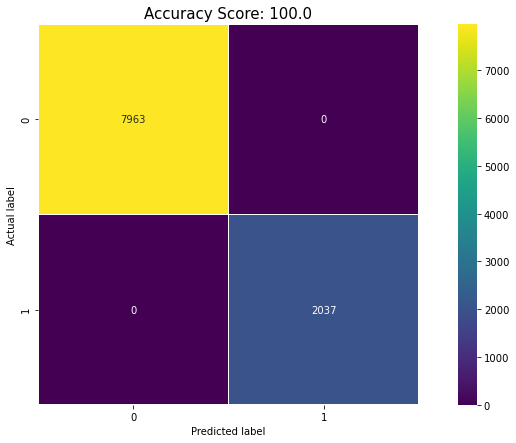

In [52]:
# Plot da matriz de confusão para o modelo Árvore de Decisão.

plt.figure(figsize=(14,7))
sb.heatmap(cmatrix_CART, annot=True, fmt=".0f", linewidths=.5, square = True, cmap='viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_CART)
plt.title(all_sample_title, size = 15);

### 7-2-4. Report de Classificação de Modelo - Classification Report - CART

In [53]:
# Sumário de classificação do modelo Árvore de Decisão.

print(classification_report(model_CART.predict(predictors),(target)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7963
           1       1.00      1.00      1.00      2037

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### 7-2-5. Curva ROC | Modelo Árvore de Decisão (CART)

<Figure size 432x288 with 0 Axes>

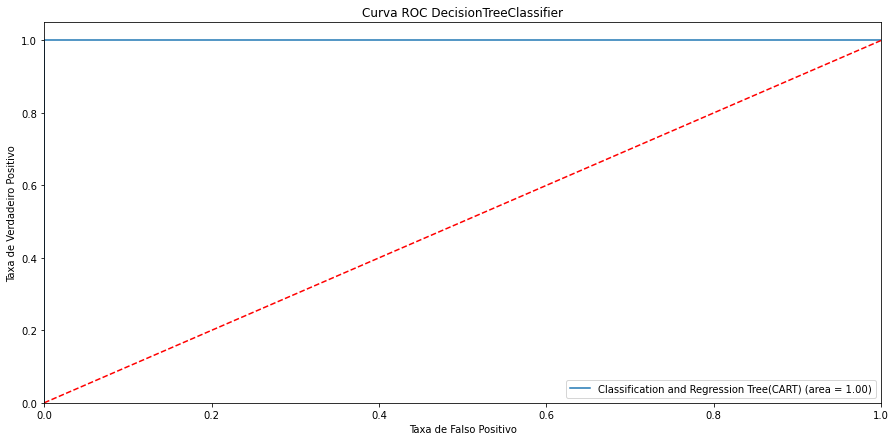

In [54]:
# Plot da Curva ROC para o modelo Árvore de Decisão.

logit_roc_auc = roc_auc_score(target, model_CART.predict(predictors))
fpr, tpr, thresholds = roc_curve(target, model_CART.predict_proba(predictors)[:,1])
plt.figure()
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, label='Classification and Regression Tree(CART) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()

# 8. MACHINE LEARNING - RANDOM FOREST

## 8-1. Definição e Aplicação do Modelo Random Forest

In [55]:
# Definição do modelo

model_RF = RandomForestClassifier()

In [56]:
# Fit do modelo

model_RF_fit = model_RF.fit(predictors, target)

In [57]:
# Predição do modelo

model_RF_predict = model_RF.predict(predictors)

In [58]:
# Criação da coluna 'predictions_RF' para receber os valores do modelo de predição.

df['predictions_RF'] = model_RF_predict 

## 8-2. Avaliação de Performance do Modelo Random Forest

### 8-2-1. MAE - Mean Absolute Error

In [59]:
# Definição do Erro Absoluto Médio (MAE), onde diz que a cada previsão feita pelo modelo, há uma chancede 21% de erro. 
# MAE = MEAN ABSOLUTE ERROR.

mae_RF = metrics.mean_absolute_error(df['Exited'], df['predictions_RF'])

print('O erro médio absoluto (MAE) do modelo Random Forest é de {}%'.format(mae_RF))

O erro médio absoluto (MAE) do modelo Random Forest é de 0.0%


### 8-2-2. Acurácia do Modelo Random Forest (Score Accuracy)

In [60]:
# Score do modelo de predição, utilizando a acurácia como parâmetro de qualidade.

score_RF = model_RF.score(predictors, target)
score_RF = round(score_RF*100,2)

print('A acurácia do modelo Random Forest (score) é de {}%'.format(score_RF))

A acurácia do modelo Random Forest (score) é de 100.0%


### 8-2-3. Matrix de Confusão (Confusion Matrix) - Modelo Random Forest

In [61]:
# Matriz de confusão do modelo Random Forest.

cmatrix_RF = metrics.confusion_matrix(target, model_RF_predict)
print("Verdadeito Positivo : ", cmatrix_RF[1, 1])
print("Verdadeiro Negativo : ", cmatrix_RF[0, 0])
print("Falso Positvo       : ", cmatrix_RF[0, 1])
print("Falso Negativo      : ", cmatrix_RF[1, 0])

Verdadeito Positivo :  2037
Verdadeiro Negativo :  7963
Falso Positvo       :  0
Falso Negativo      :  0


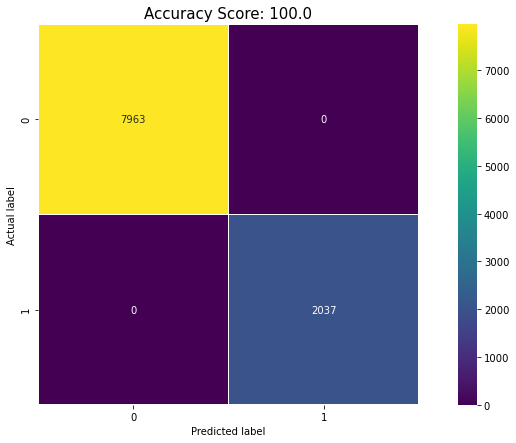

In [62]:
# Plot da matriz de confusão do modelo Random Forest.

plt.figure(figsize=(14,7))
sb.heatmap(cmatrix_RF, annot=True, fmt=".0f", linewidths=.5, square = True, cmap='viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_RF)
plt.title(all_sample_title, size = 15);

### 8-2-4. Report de Classificação de Modelo - Modelo Random Forest

In [63]:
# Sumário de classificação do modelo Random Forest

print(classification_report(model_RF.predict(predictors),(target)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7963
           1       1.00      1.00      1.00      2037

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### 8-2-5. Curva ROC - Modelo Random Forest

<Figure size 432x288 with 0 Axes>

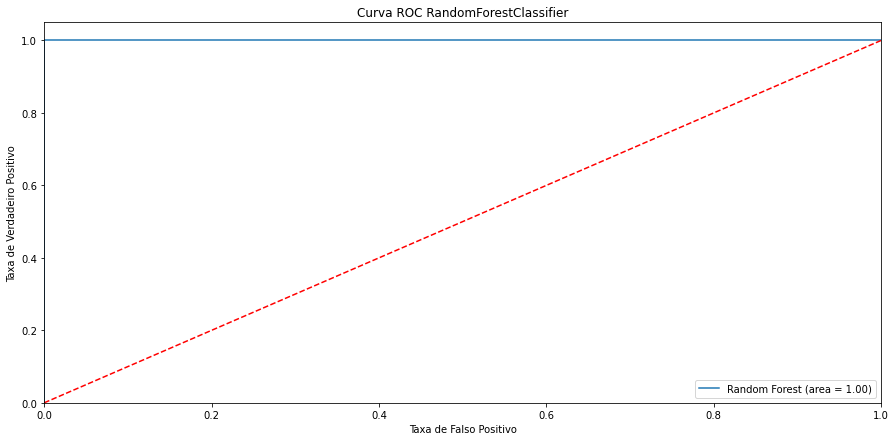

In [64]:
# Plot da Curva ROC para o modelo Random Forest.

RF_roc_auc = roc_auc_score(target, model_RF.predict(predictors))
fpr, tpr, thresholds = roc_curve(target, model_RF.predict_proba(predictors)[:,1])
plt.figure()
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()